In [1]:
import xarray as xr
from thesis_toolbox.utils import calc_spatial_correlations
from thesis_toolbox.plot.tools import map_large_scale
from thesis_toolbox.plot.plot_correlation_map import plot_polar_correlation_map
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from functools import partial
%matplotlib inline

In [11]:
path = '../../data/Master_thesis_UiO_workflow/Master_thesis_UiO_workflow/downloads/'

ds = xr.open_dataset(path+'intermediate_results/era5.single_level.sea_ice_cover.DJF.1979-2019.nc').sel(latitude=slice(90,40))
df = pd.read_csv('../Master_thesis_UiO_workflow/results/timeseries_table.csv', index_col=0)

da = xr.DataArray(df['Total'],dims='time')

ds = ds.sel(time=slice('2000',None))

ds = ds.assign_coords(time=da.time)

r, p = calc_spatial_correlations(ds['siconc'], da)

/opt/conda/envs/dust/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/envs/dust/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Text(0.5, 1.0, 'Correlation sea ice concentration dust emissions')

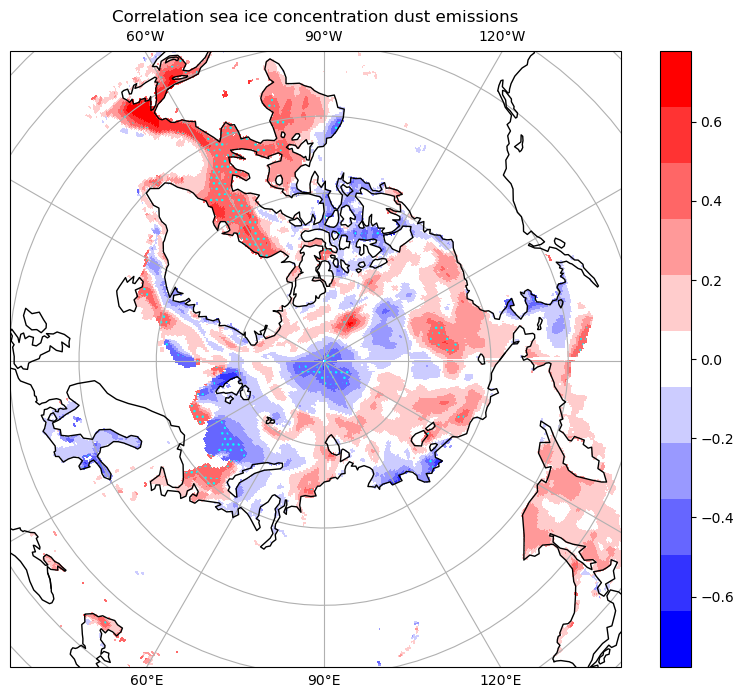

In [12]:
plot_polar_correlation_map(r,p_vals=p)
ax = plt.gca()
ax.set_title('Correlation sea ice concentration dust emissions')
# map_large_scale(ax)
# ax.gridlines()

/opt/conda/envs/dust/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/envs/dust/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Text(0.5, 1.0, 'Correlation AO sea ice concentration')

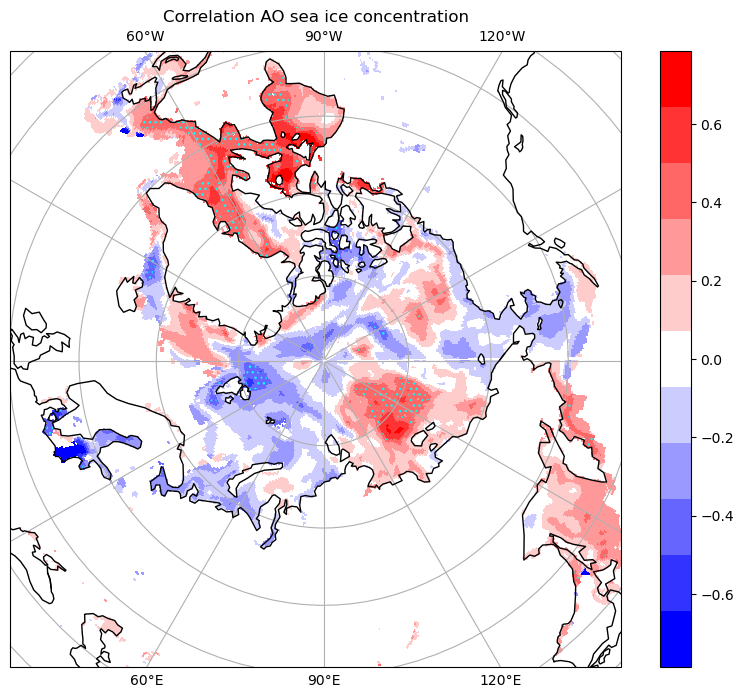

In [13]:
da = xr.DataArray(df['AO EOF DJF'],dims='time')

r, p = calc_spatial_correlations(ds['siconc'], da)

plot_polar_correlation_map(r,p_vals=p)
ax = plt.gca()
ax.set_title('Correlation AO sea ice concentration')
# map_large_scale(ax)

In [ ]:
df[total]

In [16]:
keys_wd =  ['total SACOL wetdep 2micron', 'total BAODE wetdep 2micron',
       'total LANTIAN wetdep 2micron', 'total LINGTAI wetdep 2micron',
       'total SHAPOTOU wetdep 2micron','total LUOCHUAN wetdep 2micron']
keys_dd =  ['total SACOL drydep 2micron', 'total BAODE drydep 2micron',
       'total LANTIAN drydep 2micron', 'total LINGTAI drydep 2micron',
       'total SHAPOTOU drydep 2micron','total LUOCHUAN drydep 2micron']
locs = ['SACOL','BAODE','LANTIAN','LINGTAI','SHAPOTOU','LUOCHUAN']
df_total_dep = {loc: df[dd]+df[wd] for loc, wd, dd in zip(locs,keys_wd,keys_dd)}

/opt/conda/envs/dust/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/envs/dust/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/envs/dust/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/envs/dust/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/envs/dust/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/envs/dust/lib/

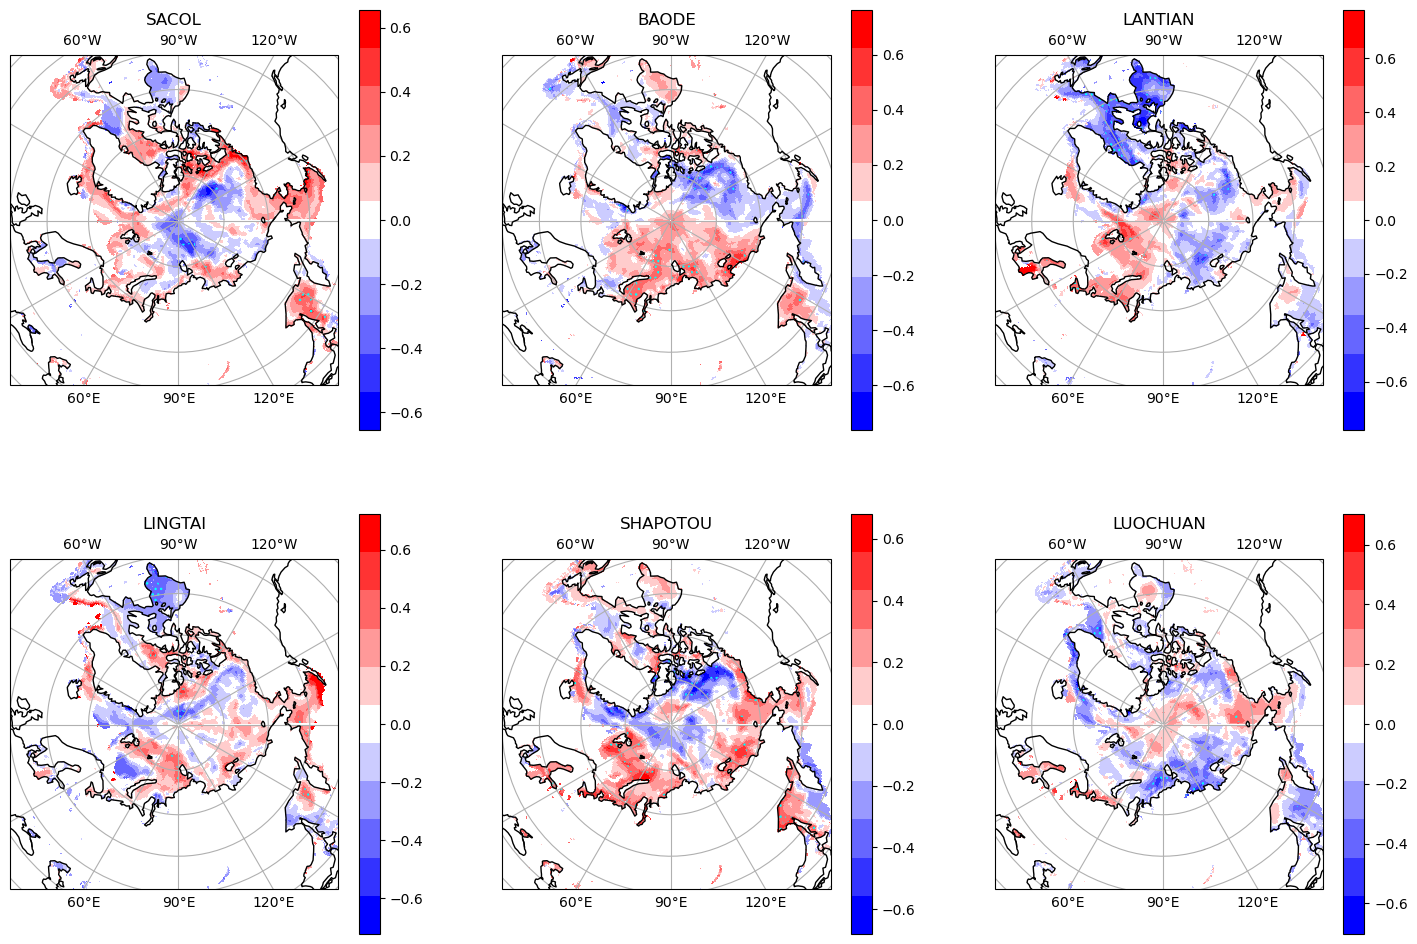

In [17]:
fig, axes = plt.subplot_mosaic(
    """
    ABC
    DEF
    """,
    subplot_kw={'projection':ccrs.Orthographic(central_longitude=90,central_latitude=90)},figsize=(18,12))
for kax,dk in zip(axes.keys(), locs):
    da = xr.DataArray(df_total_dep[dk],dims='time')
    r, p = calc_spatial_correlations(ds['siconc'], da)
    plot_polar_correlation_map(r,axes[kax],p_vals=p)
    axes[kax].set_title(dk)